In [1]:
import sys

sys.path.append("..")

In [2]:
from config import config
from config import config_indicators

from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [3]:
findownloader = FinancialDataDownloader(config.START_DATE, config.END_DATE)
data = findownloader.load_data("../" + config.DATA_DIR, config.TEST_NAME)

Data loaded from ../data/test.csv


In [4]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
data = finpreprocessor.preprocess(
    data,
    config.EXCHANGE_NYSE,
    config.USE_TECHNICAL_INDICATORS,
    list(config_indicators.TECHNICAL_INDICATORS.keys()),
    config.USE_MACROECONOMIC_INDICATORS,
    list(config_indicators.MACROECONOMIC_INDICATORS.keys()),
)

Data downloaded for 1 tickers from 2016-01-01 to 2025-01-01.


In [5]:
data.head()

,date,tic,open,high,low,close,volume,day,close_5_sma,close_10_sma,...,kdjk,kdjd,cci,boll,boll_ub,boll_lb,atr,adx,vwma,vix
0,2016-01-04,AAPL,23.184080,23.807685,23.046254,23.803165,270597600.0,0,23.803165,23.803165,...,66.468801,55.489600,0.000000,23.803165,0.000000,0.000000,0.761431,0.000000,23.552368,20.700001
1,2016-01-05,AAPL,23.893538,23.916132,23.138887,23.206669,223164000.0,1,23.504917,23.504917,...,50.459546,53.812915,-66.666667,23.504917,24.348491,22.661344,0.769631,100.000000,23.492796,19.340000
2,2016-01-06,AAPL,22.720884,23.129843,22.564984,22.752516,273829600.0,2,23.254117,23.254117,...,38.266180,48.630670,-100.000000,23.254117,24.307976,22.200258,0.723785,83.582415,23.251279,20.590000
3,2016-01-07,AAPL,22.296122,22.623740,21.787749,21.792267,324377600.0,3,22.888654,22.888654,...,25.581546,40.947629,-114.394738,22.888654,24.584949,21.192359,0.790884,85.562274,22.899753,24.990000
4,2016-01-08,AAPL,22.266741,22.393269,21.862302,21.907490,283192000.0,4,22.692421,22.692421,...,18.929670,33.608309,-84.117187,22.692421,24.403623,20.981220,0.747081,86.498694,22.725656,27.010000


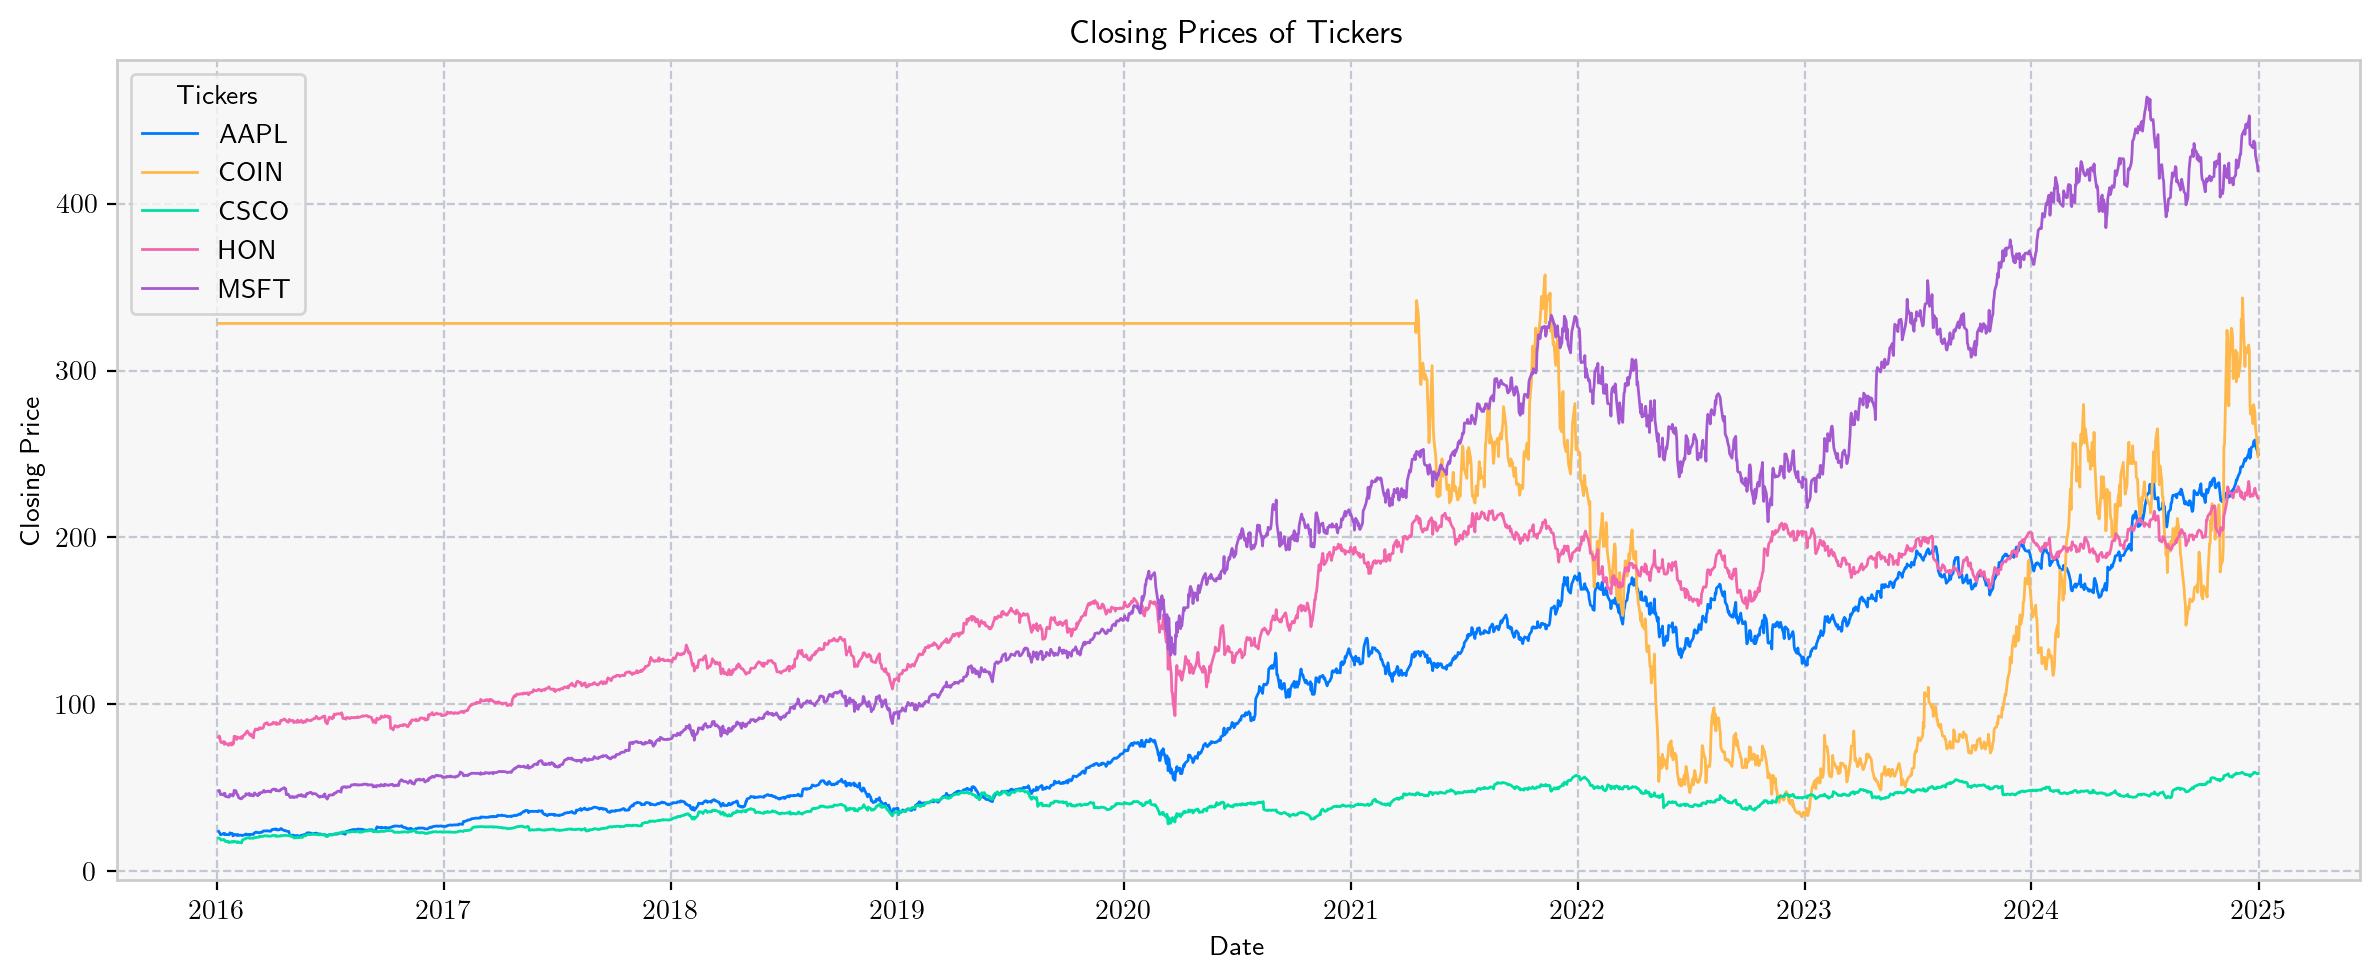

In [6]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_close_prices(
    data, "../" + config.PLOT_DIR, config.TEST_NAME + "_processed"
)

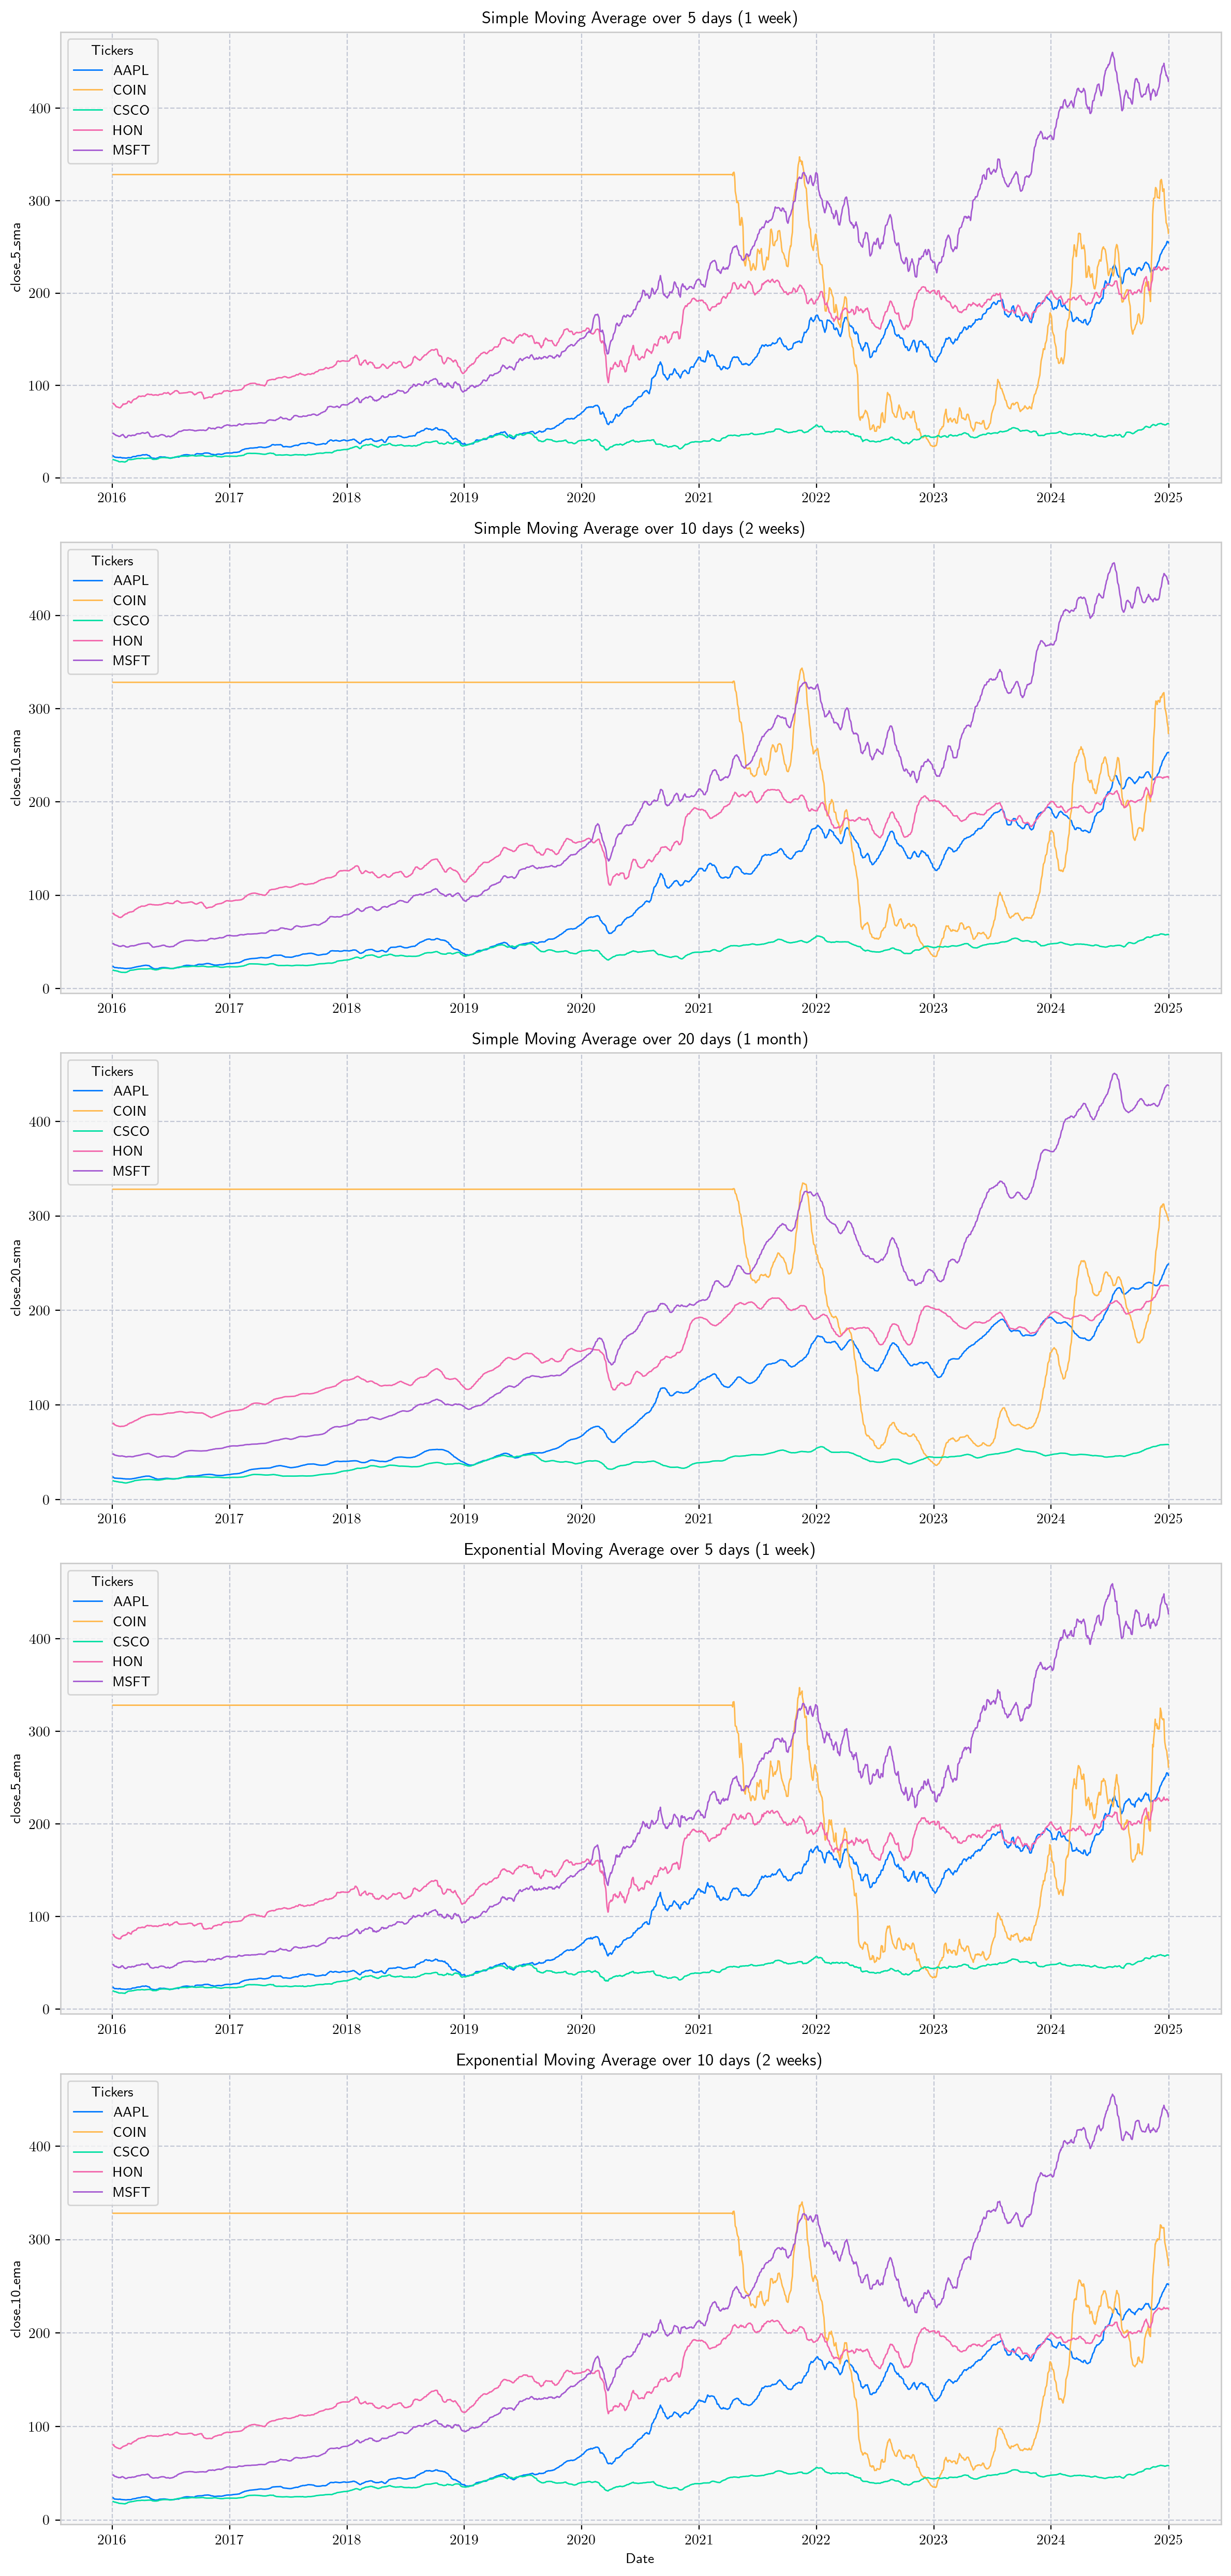

In [7]:
finvisualiser.plot_technical_indicators(
    data,
    config_indicators.TECHNICAL_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

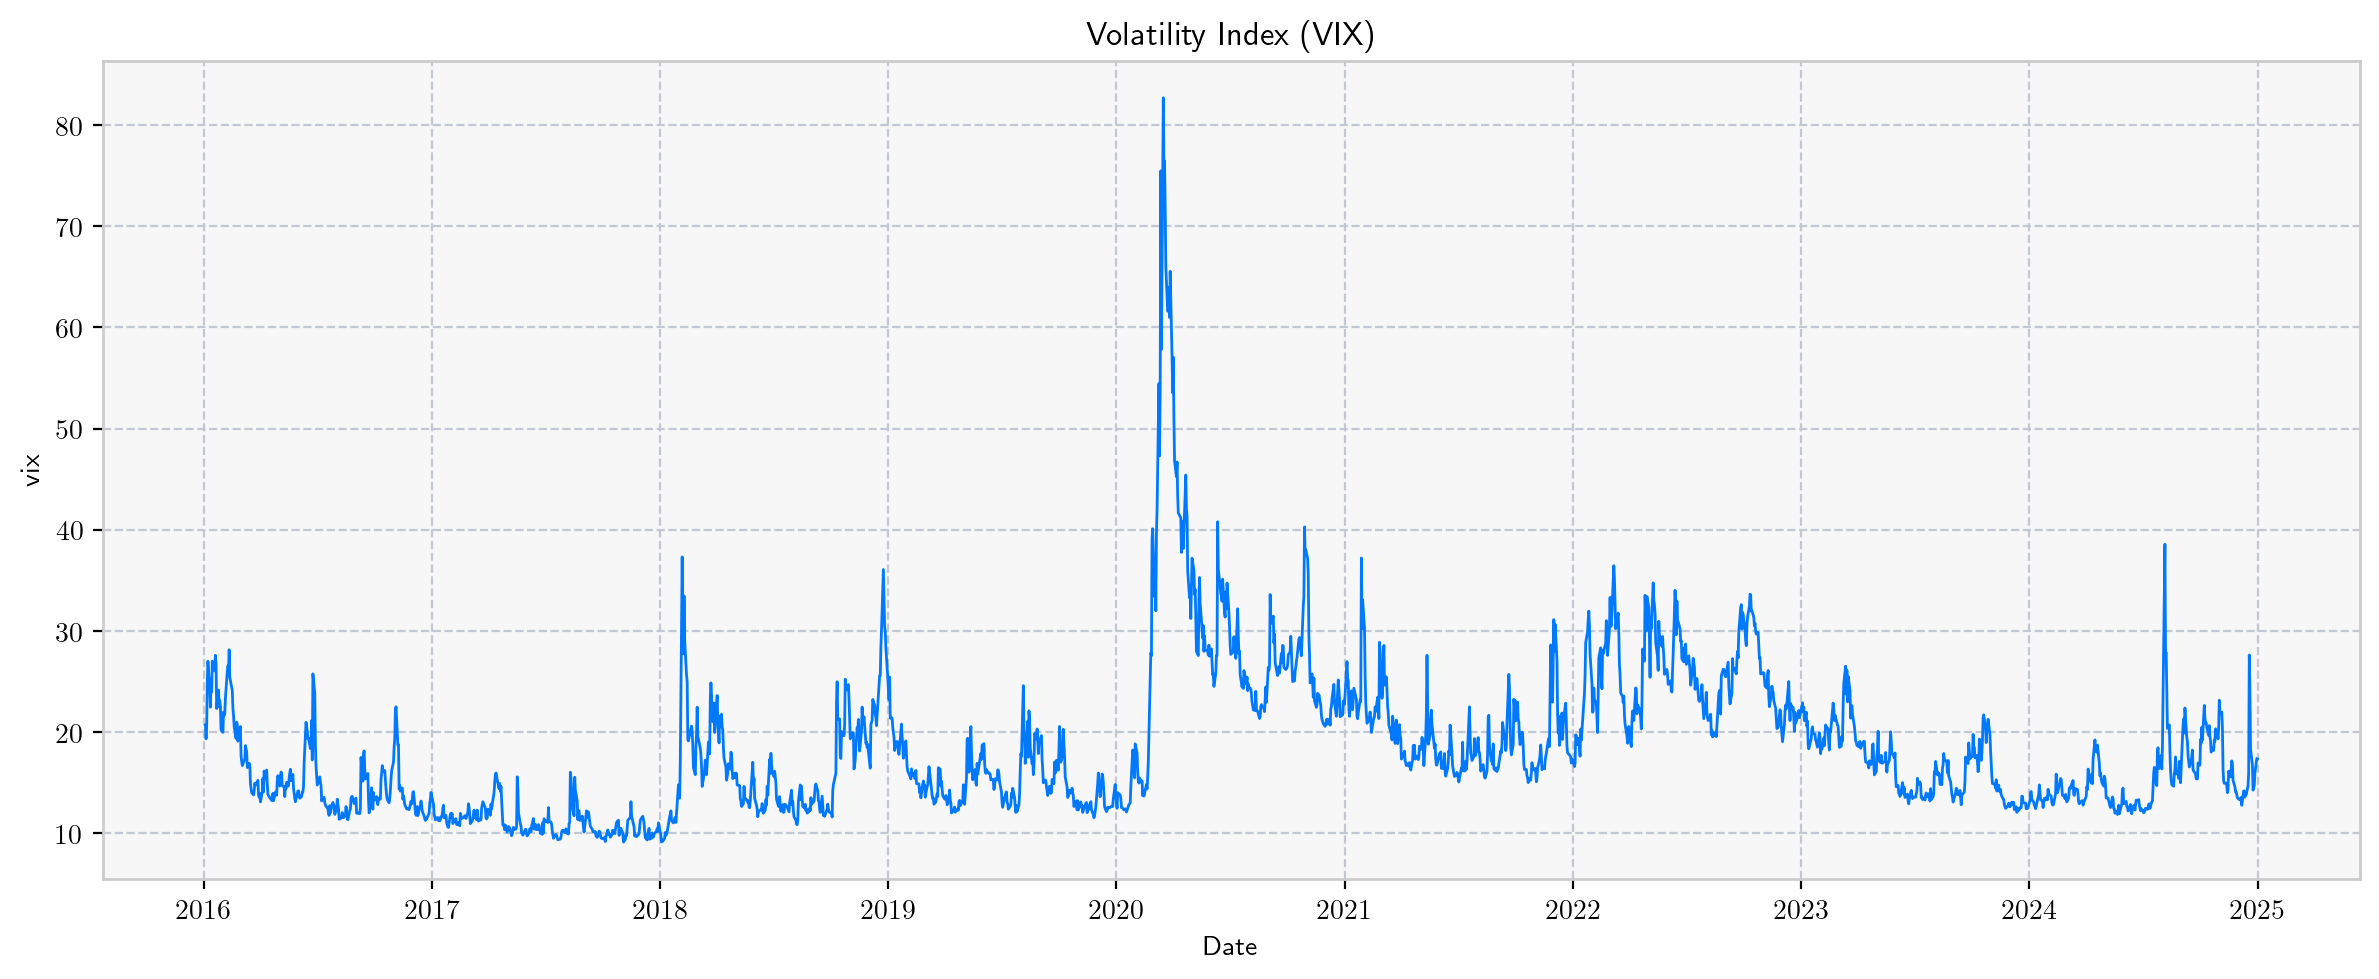

In [8]:
finvisualiser.plot_macroeconomic_indicators(
    data,
    config_indicators.MACROECONOMIC_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

In [9]:
train_data, test_data = finpreprocessor.split_train_test(
    data, config.TRAIN_END_DATE
)

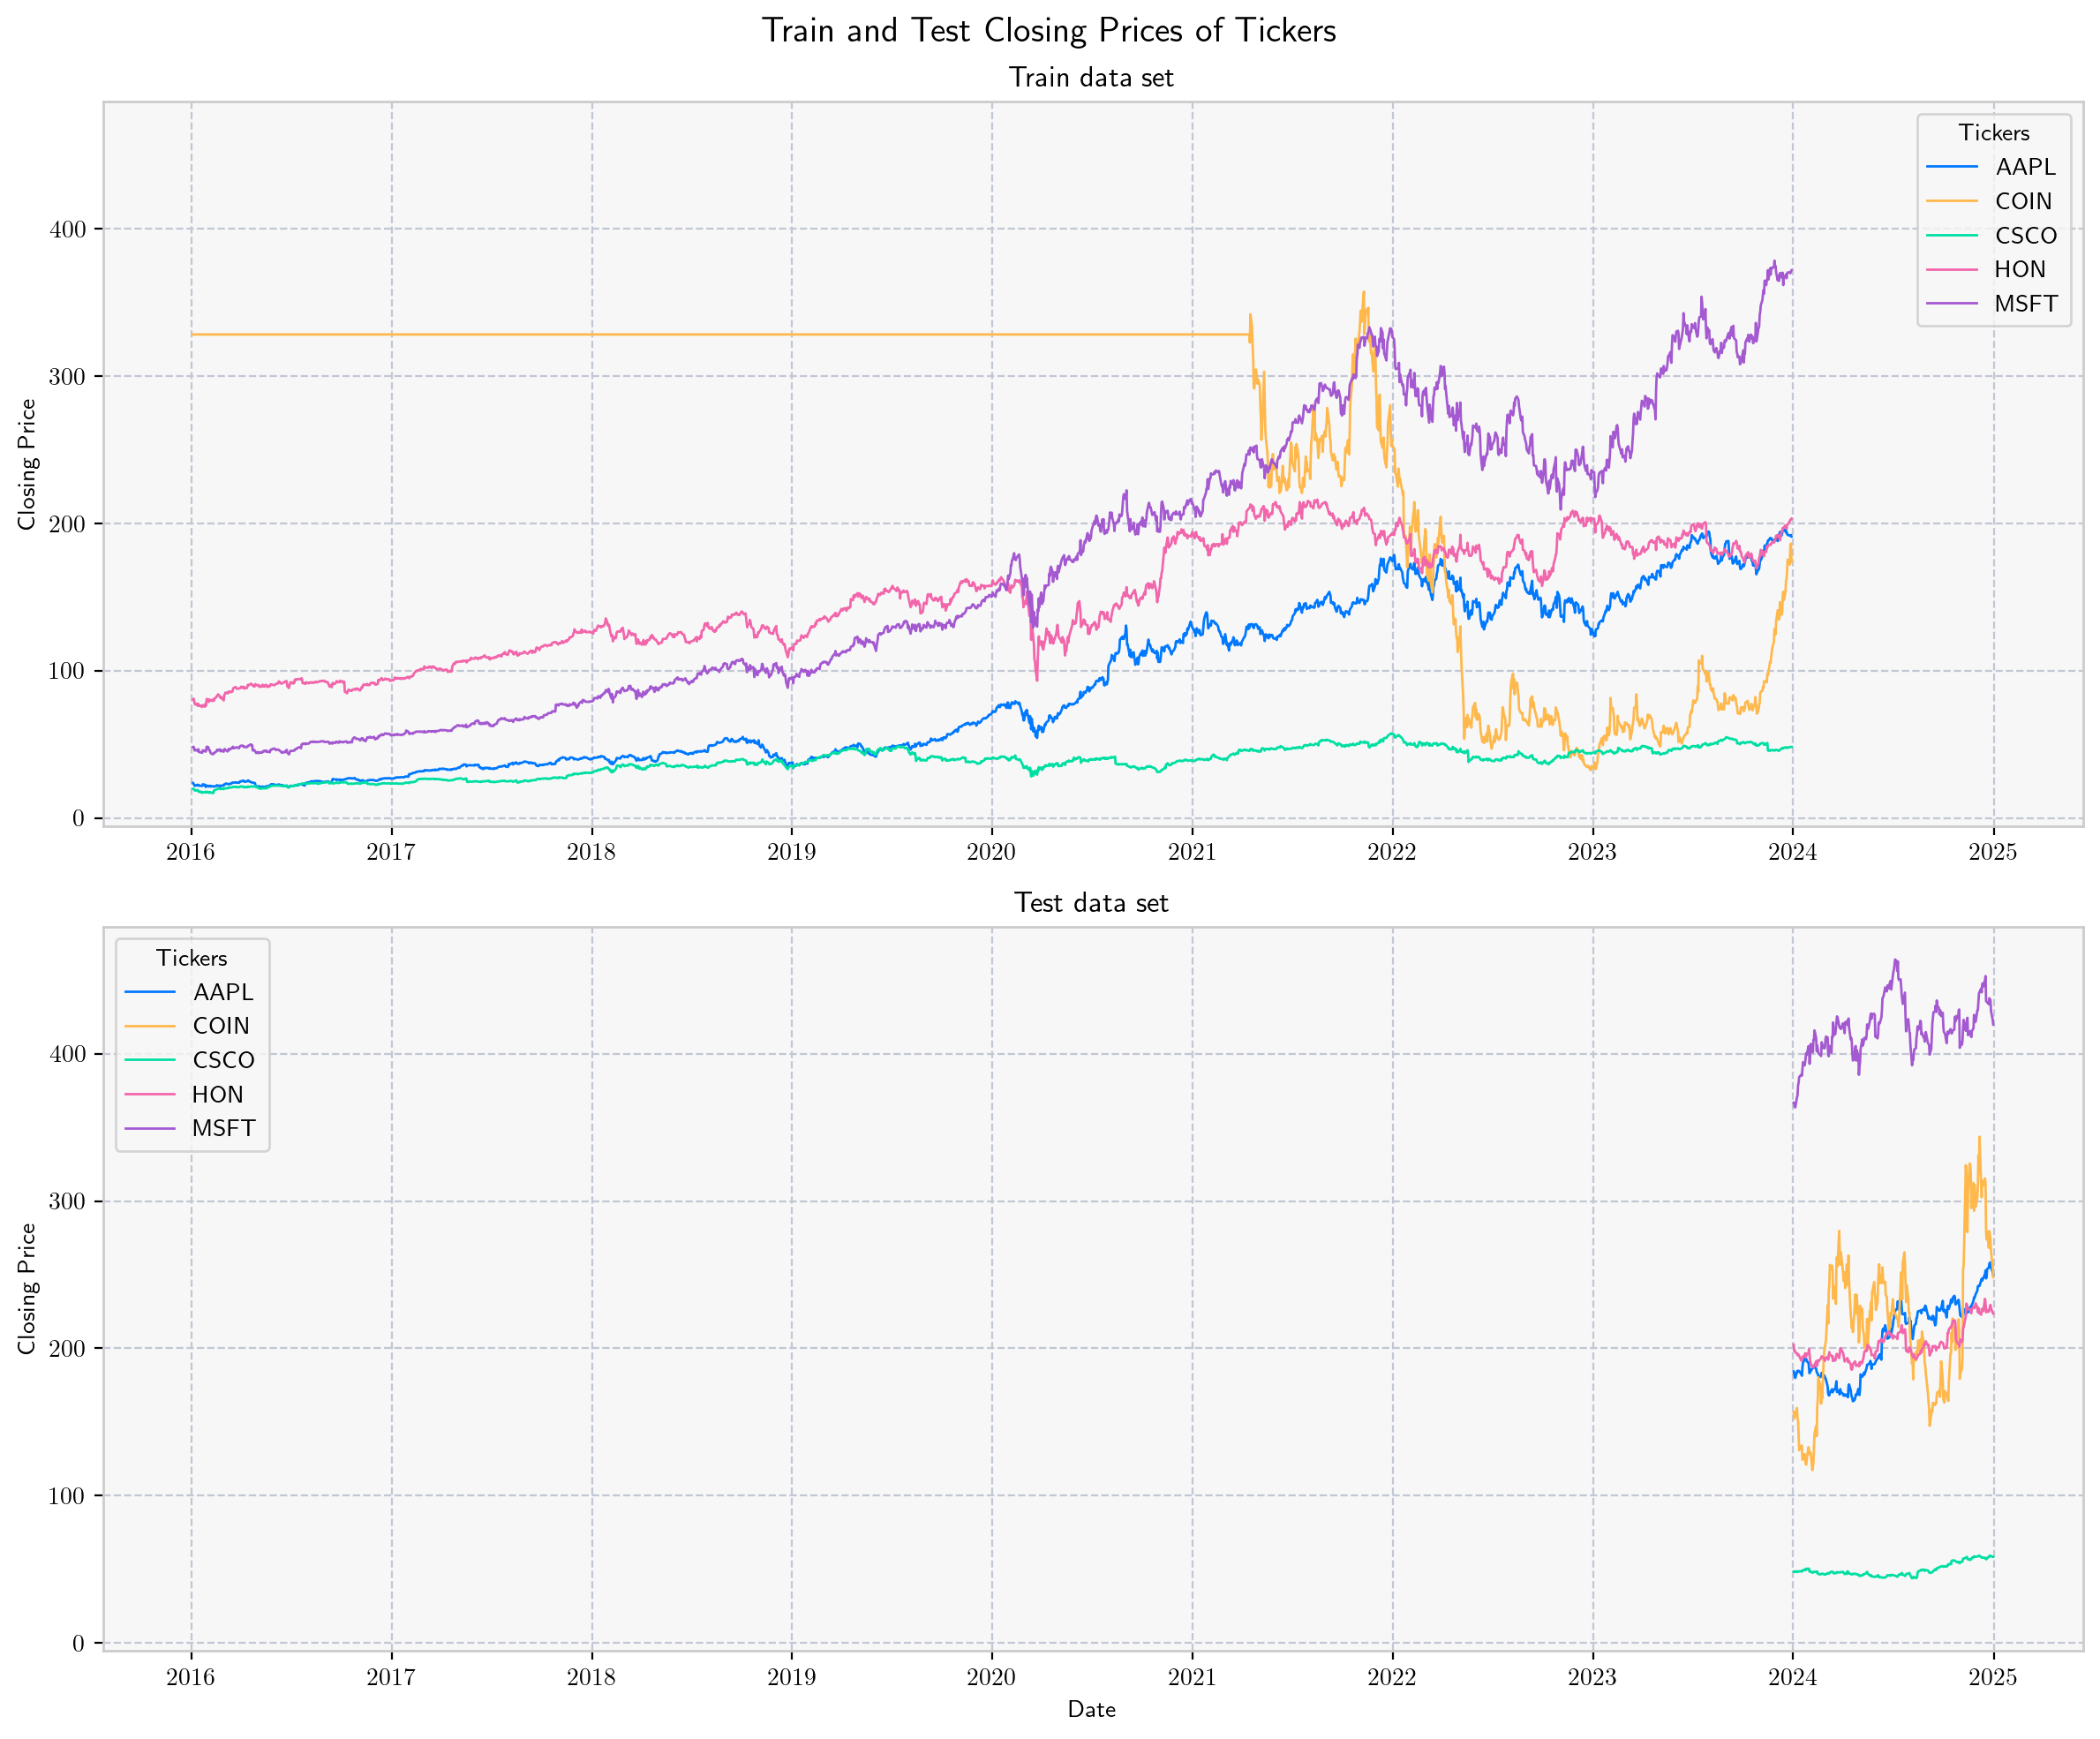

In [10]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)

In [11]:
finpreprocessor.save_train_test_data(
    train_data, test_data, "../" + config.DATA_DIR, config.TEST_NAME
)

Train data saved to ../data/test_train.csv
Test data saved to ../data/test_trade.csv


In [13]:
train_data, test_data = finpreprocessor.load_train_test_data(
    "../" + config.DATA_DIR, config.TEST_NAME
)

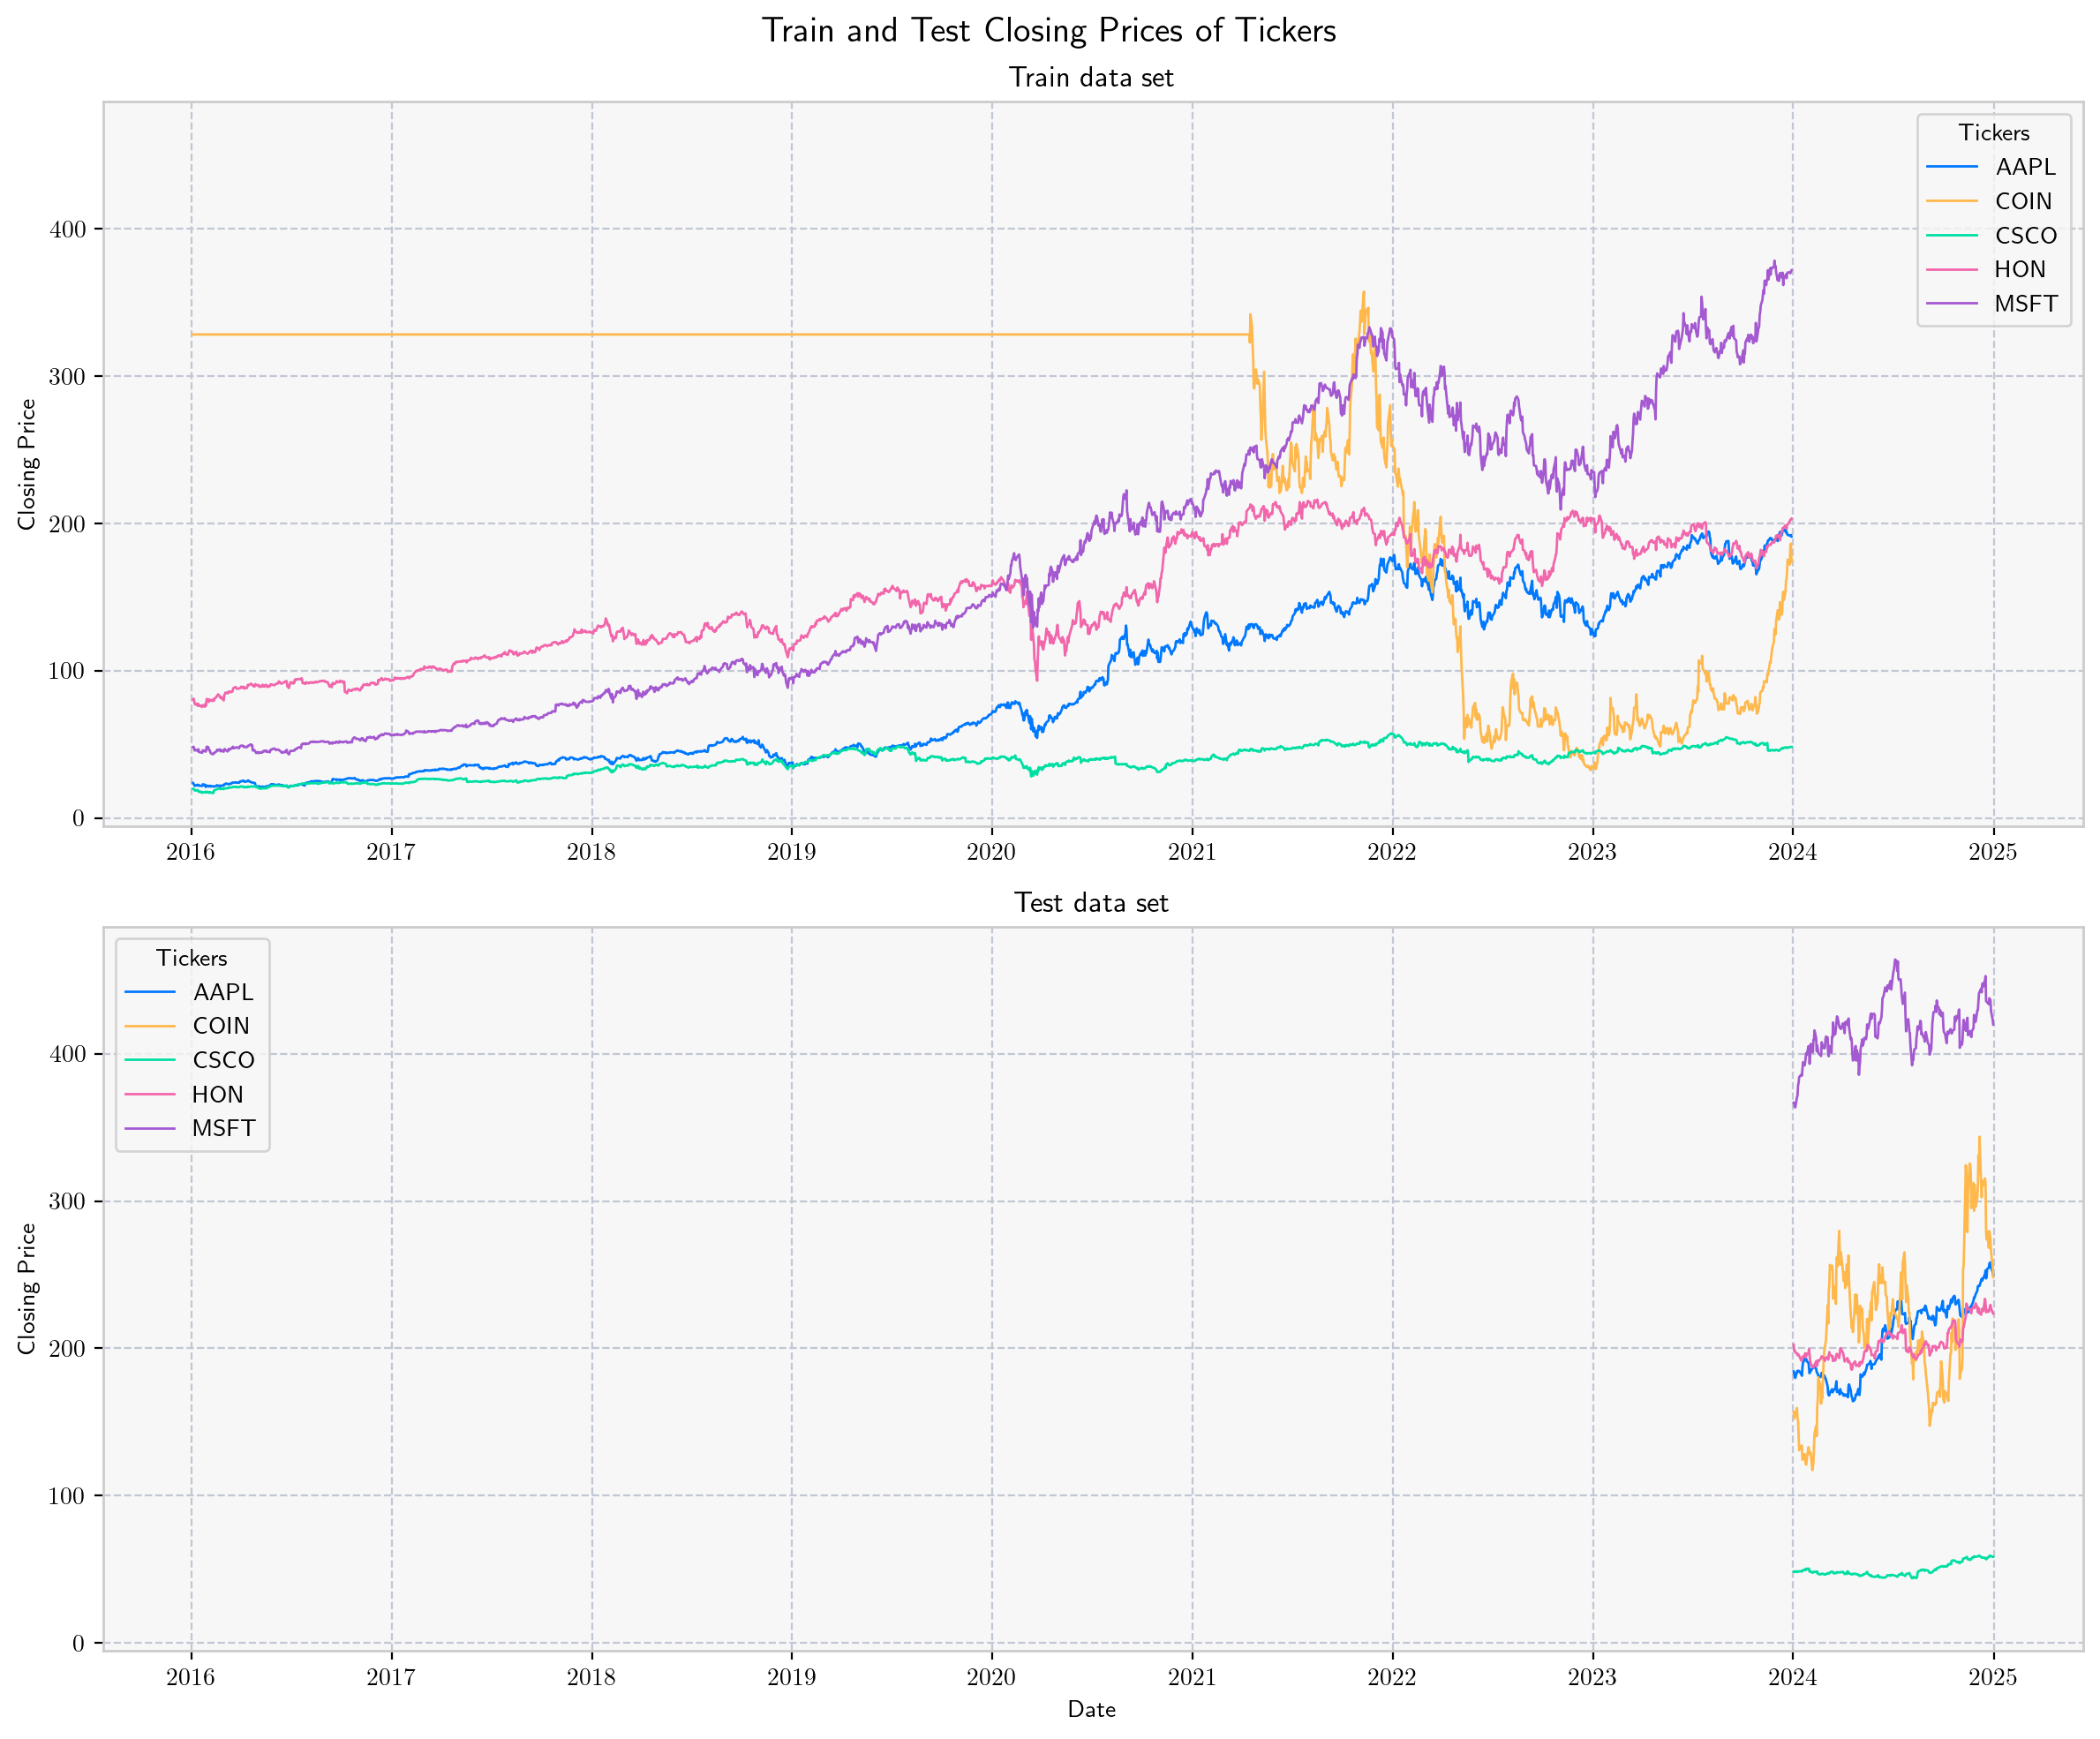

In [14]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)